<a href="https://colab.research.google.com/github/sahar7888/GAN_Models/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
from google.colab.patches import cv2_imshow

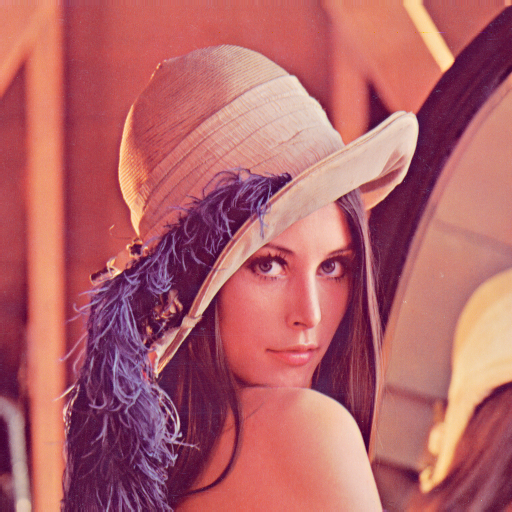

-1

In [53]:
#Readig an Image
image = cv2.imread('lena.png')
cv2_imshow(image)
cv2.waitKey(0)

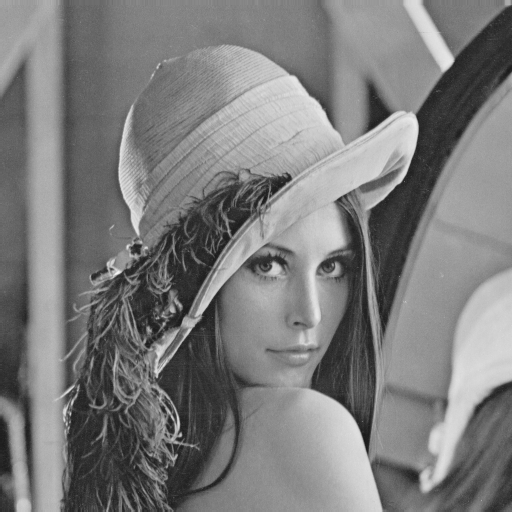

-1

In [54]:
#Convert an image from one color space to another.
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
cv2.waitKey(0)

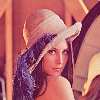

-1

In [40]:
# Resize an image to a specified size.
image_resized = cv2.resize(image, (100, 100))
cv2_imshow(image_resized)
cv2.waitKey(0)

In [41]:
#Writes an image to a file
cv2.imwrite('lena_resized.png', image_resized)

True

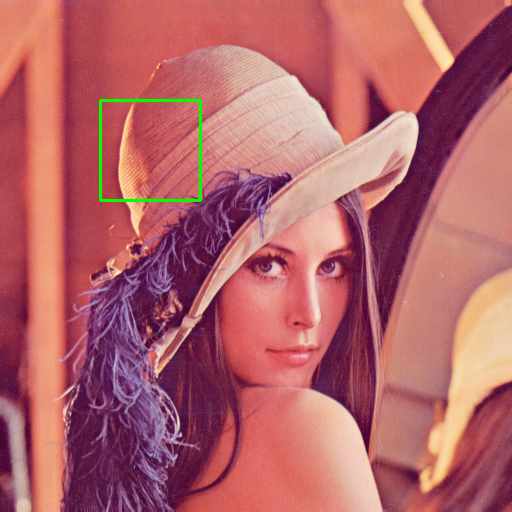

In [12]:
#Draw a rectangle on an image
image_with_rectangle = cv2.rectangle(image, (100, 100), (200, 200), (0, 255, 0), 2)
cv2_imshow(image_with_rectangle)

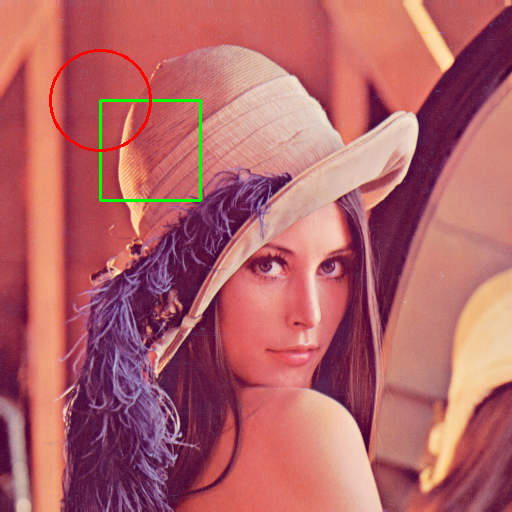

In [13]:
#: Draw a circle on an image
image_with_circle = cv2.circle(image, (100, 100), 50, (0, 0, 255), 2)
cv2_imshow(image_with_circle)

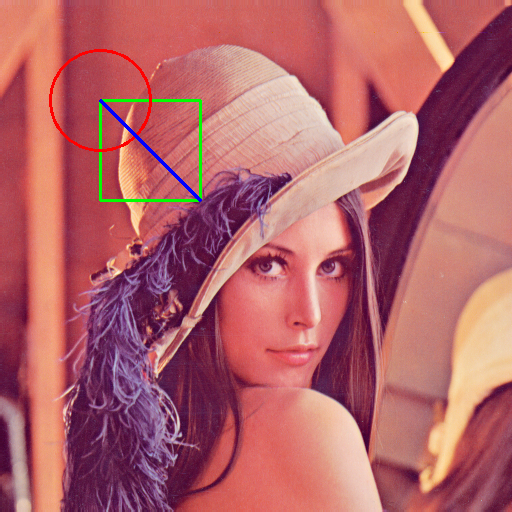

In [16]:
#Draw a line on an image
image_with_line = cv2.line(image, (100, 100), (200, 200), (255, 0, 0), 2)
cv2_imshow(image_with_line)


array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)
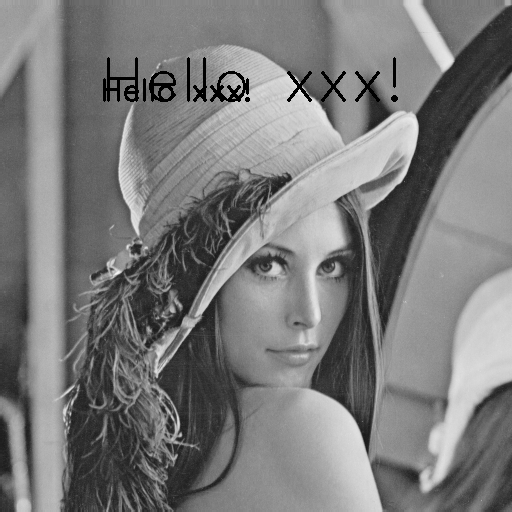

In [28]:
#Writes text on an image
# cv2.putText(image_gray, "Hello xxx!", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 200, 255), 2)

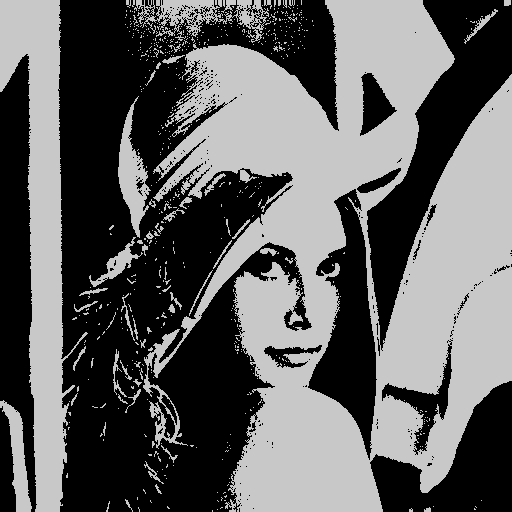

In [47]:
#Applies a fixed-level threshold to an image
ret, thresholded_image = cv2.threshold(image_gray, 130, 200, cv2.THRESH_BINARY)
cv2_imshow(thresholded_image)

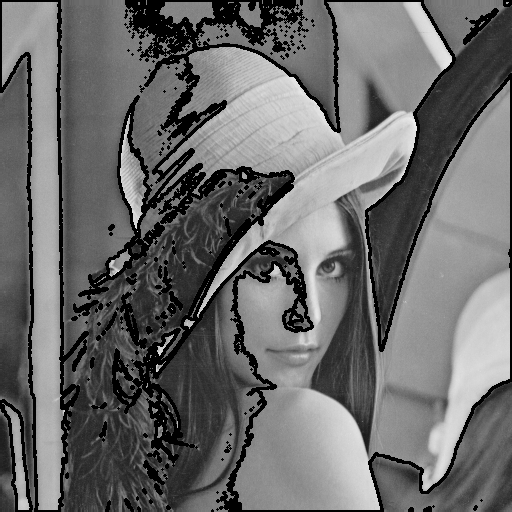

In [50]:
# Finds contours in a binary image
contours, hierarchy = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_gray, contours, -1, (0, 255, 0), 2)
cv2_imshow(image_gray)


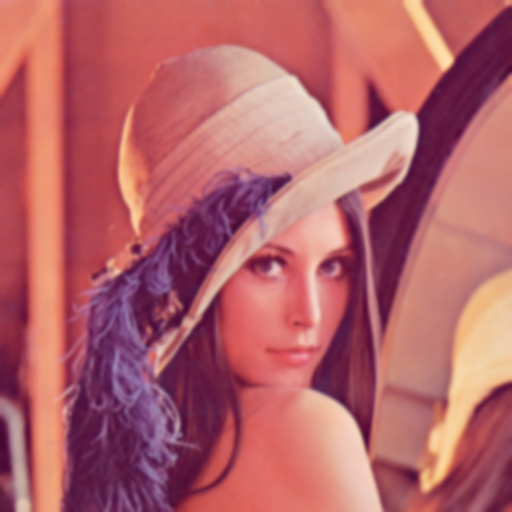

In [57]:
#Applies Gaussian blur to an image
blurred_image = cv2.GaussianBlur(image, (9, 9), 0)
cv2_imshow(blurred_image)

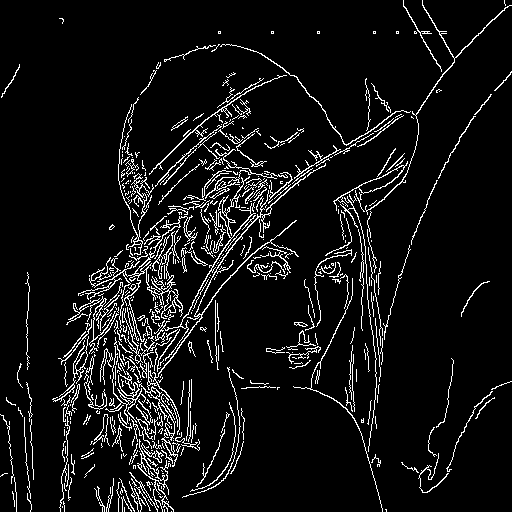

In [58]:
# Applies Canny edge detection to an image.
edges = cv2.Canny(image, 100, 200)
cv2_imshow(edges)


In [61]:
# # Detects lines in an image using Probabilistic Hough Transform.
# lines = cv2.HoughLinesP(edges, 10, 0.5, 100, 50, 10)
# cv2.polylines(image, lines, (0, 0, 255), 2)
# cv2_imshow(image)


In [63]:
#Detects circles in an image using Hough Circle Transform
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 2, 5, param1=100, param2=30, minRadius=0, maxRadius=0)
# # cv2.drawCircles(image, circles, (0, 255, 0), 2)
# cv2_imshow(image)

In [ ]:
#Matches a template image within a larger image
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


In [ ]:
#Applies perspective transformation to an image.
M = cv2.getPerspectiveTransform(src_points, dst_points)
warped_image = cv2.warpPerspective(image, M, (width, height))


In [64]:
def pixel_to_realworld(pixel_coords, scale_factor, origin_offset):
    """
    Convert pixel coordinates to real-world coordinates.

    Args:
    - pixel_coords: Tuple (x, y) representing the pixel coordinates.
    - scale_factor: Scale factor for converting pixel units to real-world units (e.g., meters per pixel).
    - origin_offset: Tuple (x_offset, y_offset) representing the offset of the origin in real-world coordinates.

    Returns:
    - Tuple (x_real, y_real) representing the real-world coordinates.
    """
    x_pixel, y_pixel = pixel_coords
    x_offset, y_offset = origin_offset
    x_real = x_pixel * scale_factor + x_offset
    y_real = y_pixel * scale_factor + y_offset
    return x_real, y_real

# Example usage
pixel_coords = (100, 200)  # Pixel coordinates (x, y)
scale_factor = 0.1  # Scale factor (meters per pixel)
origin_offset = (0, 0)  # Origin offset (real-world coordinates)
x_real, y_real = pixel_to_realworld(pixel_coords, scale_factor, origin_offset)
print("Real-world coordinates:", x_real, y_real)


Real-world coordinates: 10.0 20.0


In [65]:
def distance_to_camera(focal_length, real_object_width, object_width_in_pixels):
    """
    Calculate the distance from an object to the camera.

    Args:
    - focal_length: Focal length of the camera lens (in millimeters).
    - real_object_width: Width of the object in the real world (in millimeters, meters, etc.).
    - object_width_in_pixels: Width of the object in the image (in pixels).

    Returns:
    - Distance from the object to the camera (in the same unit as real_object_width).
    """
    return (focal_length * real_object_width) / object_width_in_pixels

# Example usage
focal_length = 50  # Focal length of the camera lens (in millimeters)
real_object_width = 1000  # Width of the object in the real world (in millimeters)
object_width_in_pixels = 200  # Width of the object in the image (in pixels)
distance = distance_to_camera(focal_length, real_object_width, object_width_in_pixels)
print("Distance to object:", distance, "millimeters")


Distance to object: 250.0 millimeters


In [ ]:
#Camera calibration: https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html